In [1]:
# https://github.com/xinntao/ESRGAN

# https://drive.google.com/file/d/1pJ_T-V1dpb1ewoEra1TGSWl5e6H7M4NN/view?usp=drive_link
# https://drive.google.com/file/d/1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene/view?usp=drive_link

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

Text(0.5, 1.0, 'lowResImg')

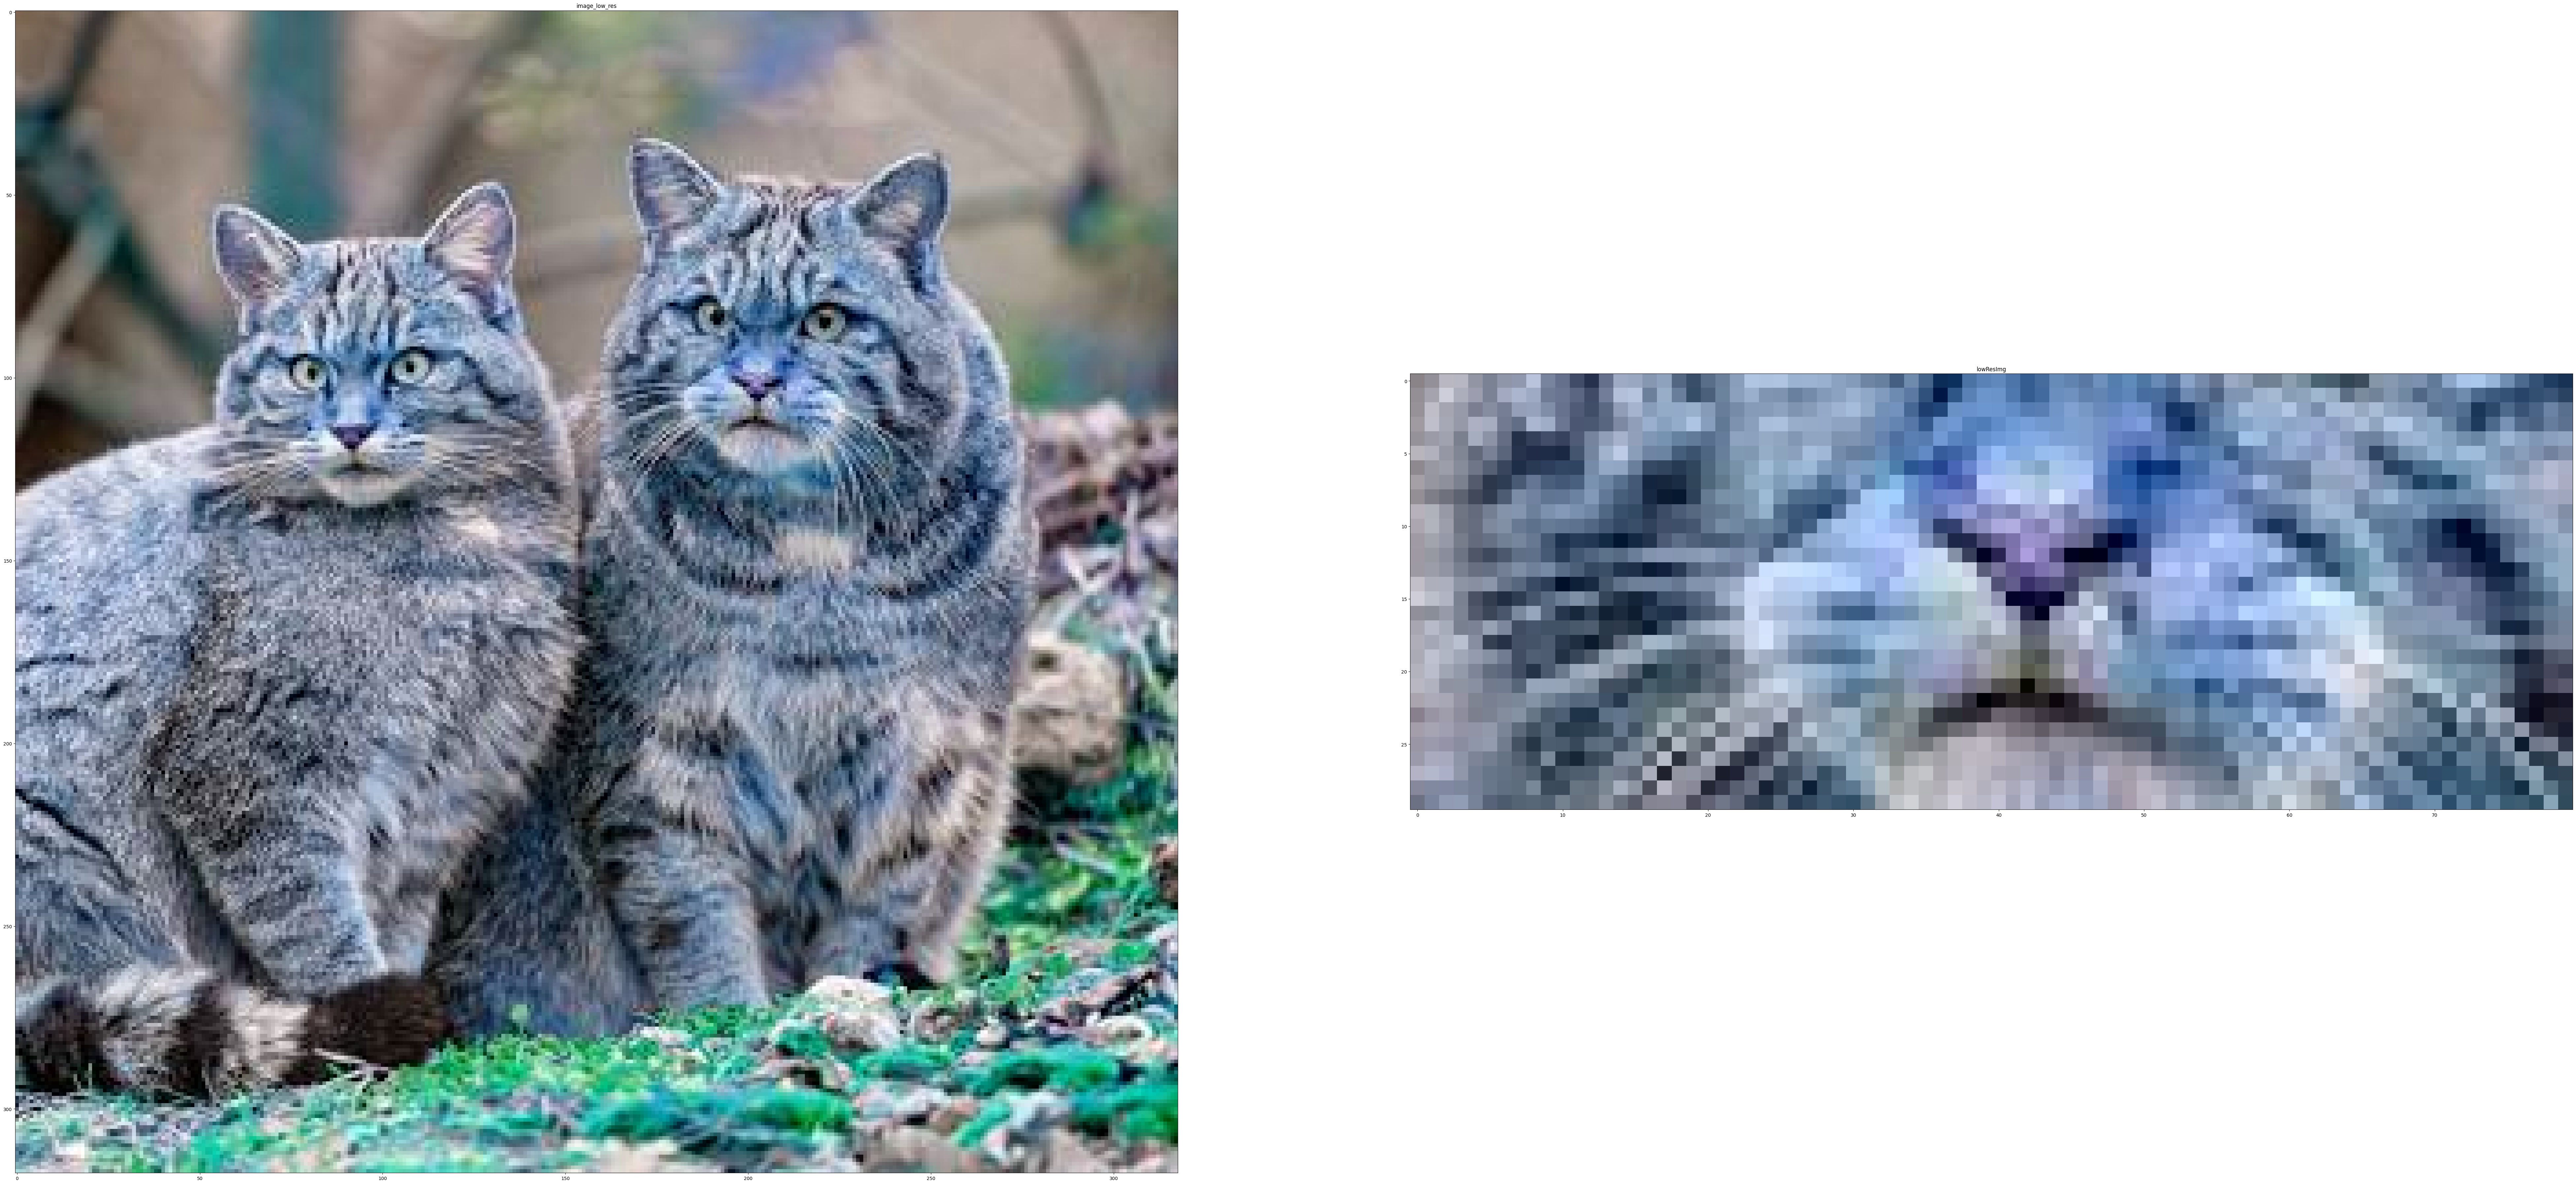

In [5]:
image_low_res = cv2.imread('../images/lowRes.jpg')

lowResImg = image_low_res[90:120 , 160:240]


fig = plt.figure(figsize=(100, 100), dpi=100)

fig.add_subplot(1,2, 1)
plt.imshow(image_low_res, cmap='gray')
plt.title('image_low_res')

fig.add_subplot(1,2, 2)
plt.imshow(lowResImg, cmap='gray')
plt.title('lowResImg')


In [6]:

# This is a model of Enhanced Super Resolution GAN Model
# The link given here is a model of ESRGAN model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)




In [ ]:
def preprocessing(img):
    imageSize = (tf.convert_to_tensor(img.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(
        img, 0, 0, imageSize[0], imageSize[1])
    preprocessed_image = tf.cast(cropped_image, tf.float32)
    return tf.expand_dims(preprocessed_image, 0)


In [8]:

preprocessed_image = preprocessing(lowResImg)  # Preprocess the LR Image
new_image = model(preprocessed_image)  # Runs the model
# returns the size of the original argument that is given as input
image_hr = tf.squeeze(new_image) / 255.0

Text(0.5, 1.0, 'image_hr')

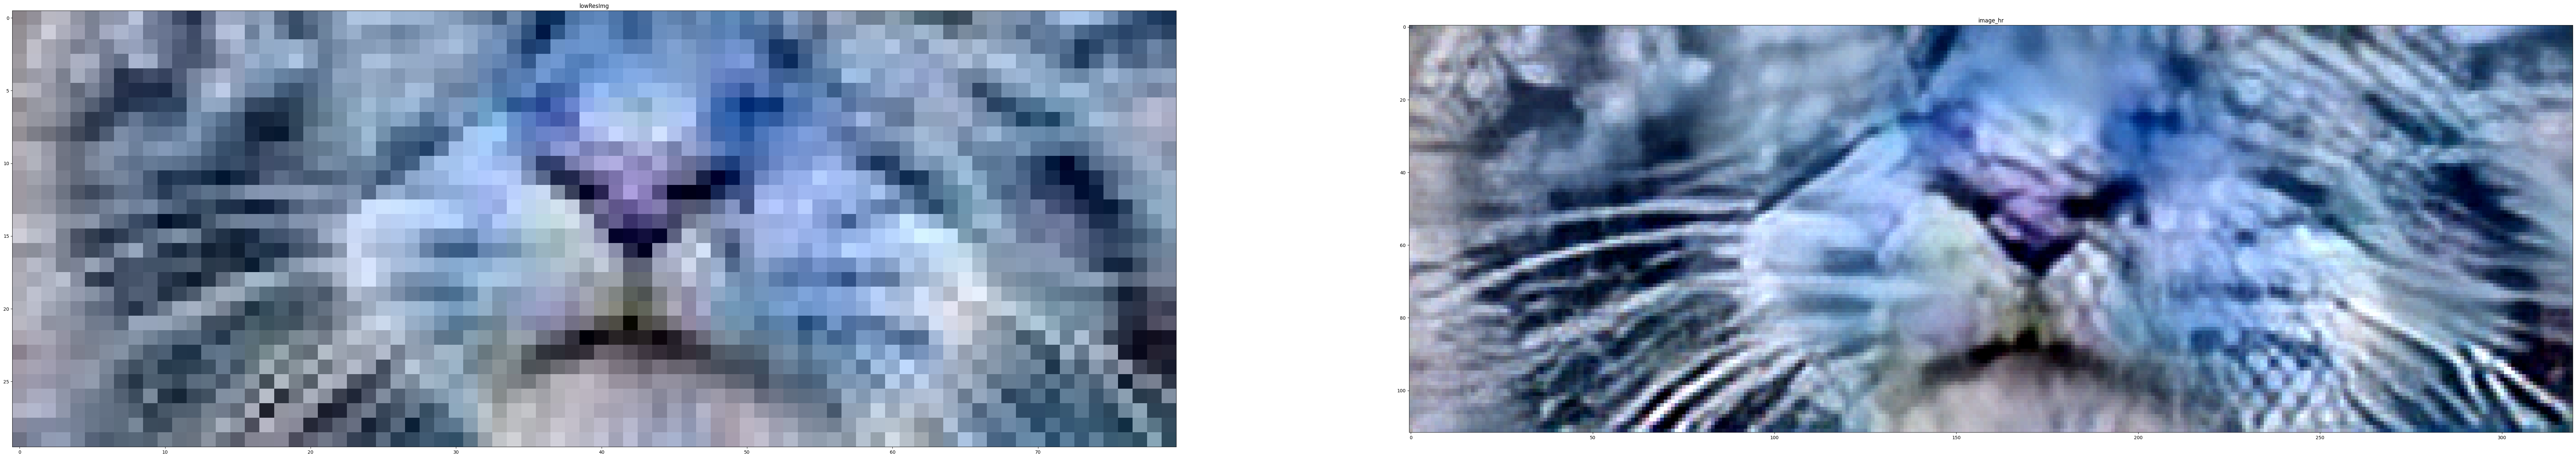

In [9]:
fig = plt.figure(figsize=(100, 100), dpi=100)

fig.add_subplot(1,2, 1)
plt.imshow(lowResImg, cmap='gray')
plt.title('lowResImg')

fig.add_subplot(1,2, 2)
plt.imshow(image_hr, cmap='gray')
plt.title('image_hr')